In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report, accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/')

data = pd.read_csv('KAG_conversion_data.csv')

Mounted at /content/drive


## Data Overview and Descriptive Statistics

In [ ]:
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [ ]:
data.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [ ]:
data.gender.unique()

array(['M', 'F'], dtype=object)

In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB
None


In [ ]:
data.interest.value_counts().count()

40

In [ ]:
data.xyz_campaign_id.value_counts().count()

3

In [ ]:
data.fb_campaign_id.value_counts().count()

691

In [ ]:
data.isnull().sum()

,0
ad_id,0
xyz_campaign_id,0
fb_campaign_id,0
age,0
gender,0
interest,0
Impressions,0
Clicks,0
Spent,0
Total_Conversion,0


In [ ]:
#change 'interest' data type to object as they reprecent a category rather than a value
data.astype({'interest': 'object'}).dtypes

,0
ad_id,int64
xyz_campaign_id,int64
fb_campaign_id,int64
age,object
gender,object
interest,object
Impressions,int64
Clicks,int64
Spent,float64
Total_Conversion,int64


In [ ]:
# Investigating variables
for i in data.columns:
    if data[i].nunique() < 10:
        print(f'The column "{i}" is __{data[i].dtype}__ \nhas __{data[i].nunique()}__ unique values: \n{data[i].value_counts()}')
        print(10*'==')
    else:
        print(f'The column "{i}" is __{data[i].dtype}__ \nhas __{data[i].nunique()}__ unique values')
        print(10*'==')

The column "ad_id" is __int64__ 
has __1143__ unique values
The column "xyz_campaign_id" is __int64__ 
has __3__ unique values: 
xyz_campaign_id
1178    625
936     464
916      54
Name: count, dtype: int64
The column "fb_campaign_id" is __int64__ 
has __691__ unique values
The column "age" is __object__ 
has __4__ unique values: 
age
30-34    426
45-49    259
35-39    248
40-44    210
Name: count, dtype: int64
The column "gender" is __object__ 
has __2__ unique values: 
gender
M    592
F    551
Name: count, dtype: int64
The column "interest" is __int64__ 
has __40__ unique values
The column "Impressions" is __int64__ 
has __1130__ unique values
The column "Clicks" is __int64__ 
has __183__ unique values
The column "Spent" is __float64__ 
has __869__ unique values
The column "Total_Conversion" is __int64__ 
has __32__ unique values
The column "Approved_Conversion" is __int64__ 
has __16__ unique values


In [ ]:
#data.set_index('ad_id',inplace=True)

In [ ]:
print('Total ADS: {}'.format(data.shape[0]))

# Make sure to match the actual column names
print('Number of ADS with 0 clicks: {}'.format(len(data.loc[data['Clicks'] == 0])))
print('Number of 0 paids to FACEBOOK for showing ADS: {}'.format(len(data.loc[data['Spent'] == 0])))
print('Number of ADS with 0 enquires about their product: {}'.format(len(data.loc[data['Total_Conversion'] == 0])))
print('Number of ADS with 0 buys: {}'.format(len(data.loc[data['Approved_Conversion'] == 0])))

Total ADS: 1143
Number of ADS with 0 clicks: 207
Number of 0 paids to FACEBOOK for showing ADS: 207
Number of ADS with 0 enquires about their product: 8
Number of ADS with 0 buys: 559


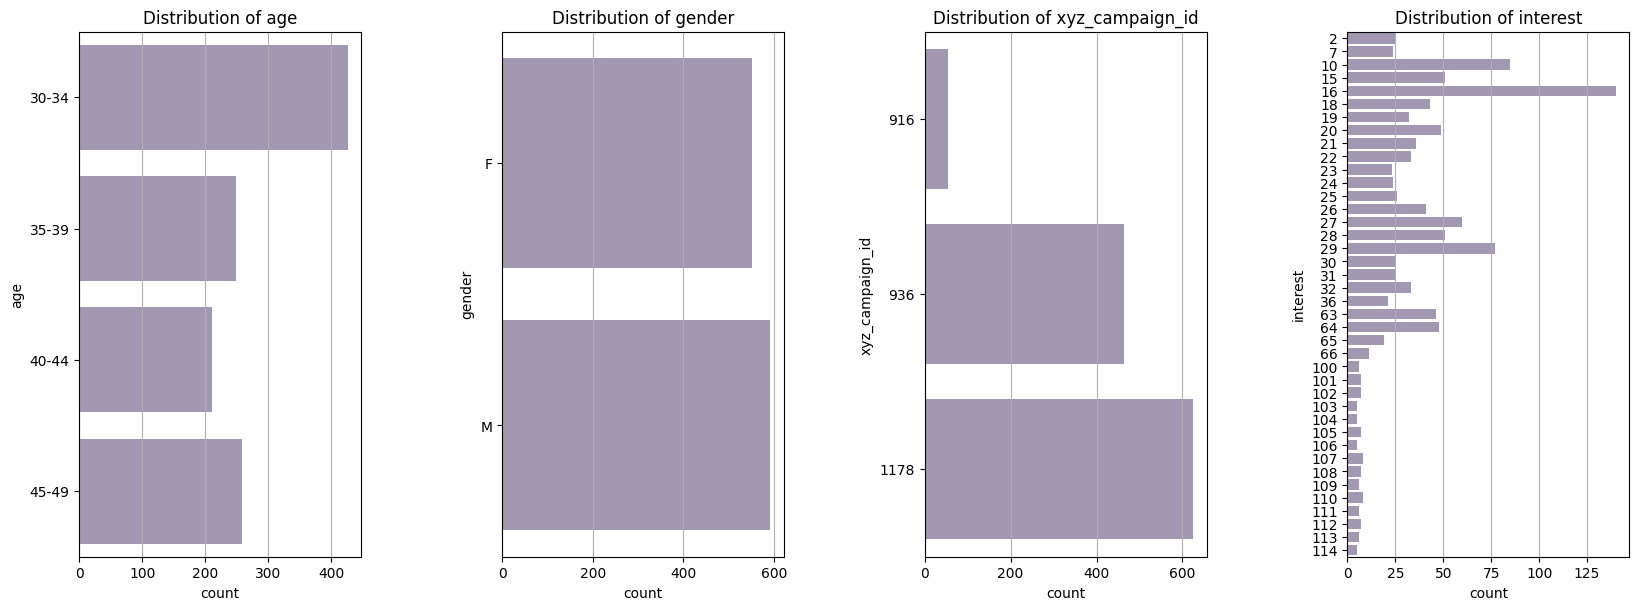

In [ ]:
# Define the categories
categories = ['ad_id', 'fb_campaign_id','age','gender', 'xyz_campaign_id', 'interest']

# Convert relevant columns to 'category' type
data[categories] = data[categories].astype('category')

# Distribution of categorical variables (excluding 'ad_id' and 'fb_campaign_id')
x = 0
fig = plt.figure(figsize=(20, 15))
plt.subplots_adjust(wspace=0.5)

# Loop through and plot each categorical variable
for i in data[categories[2:]]:
    ax = plt.subplot(241 + x)
    ax = sns.countplot(data=data, y=i, color='#A194B6')
    plt.grid(axis='x')
    ax.set_title(f'Distribution of {i}')
    x += 1

plt.show()

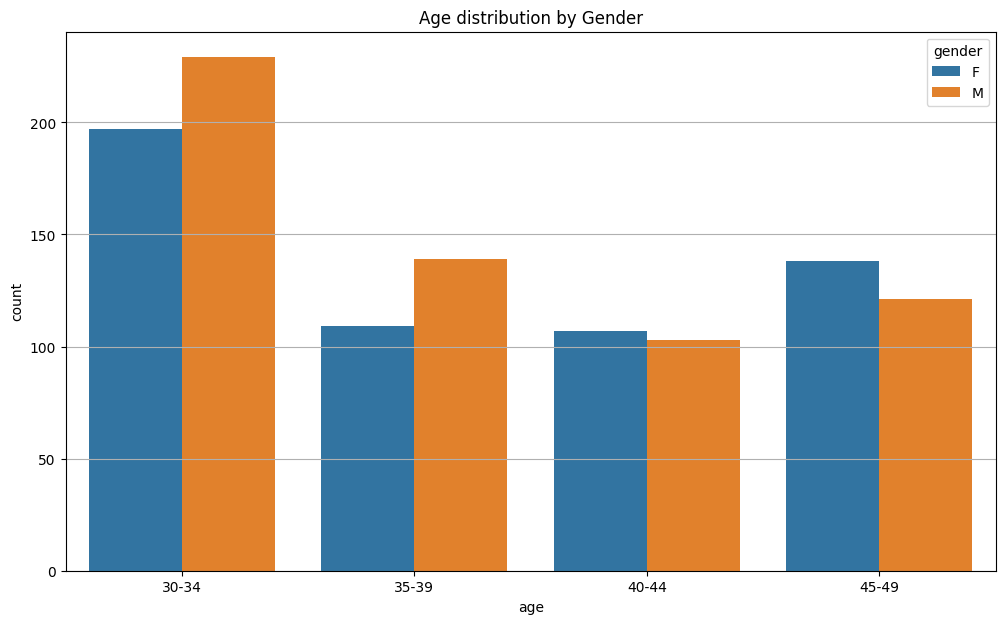

In [ ]:
# Initialize the figure with a specified size
fig = plt.figure(figsize=(12, 7))

# Create a countplot for 'age' with 'gender' as hue
sns.countplot(data=data, x='age', hue='gender')

# Add title and grid lines for better readability
plt.title('Age distribution by Gender')
plt.grid(axis='y')  # Add grid lines along the y-axis for clarity

# Show the plot
plt.show()

In [ ]:
print(data.columns)

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')


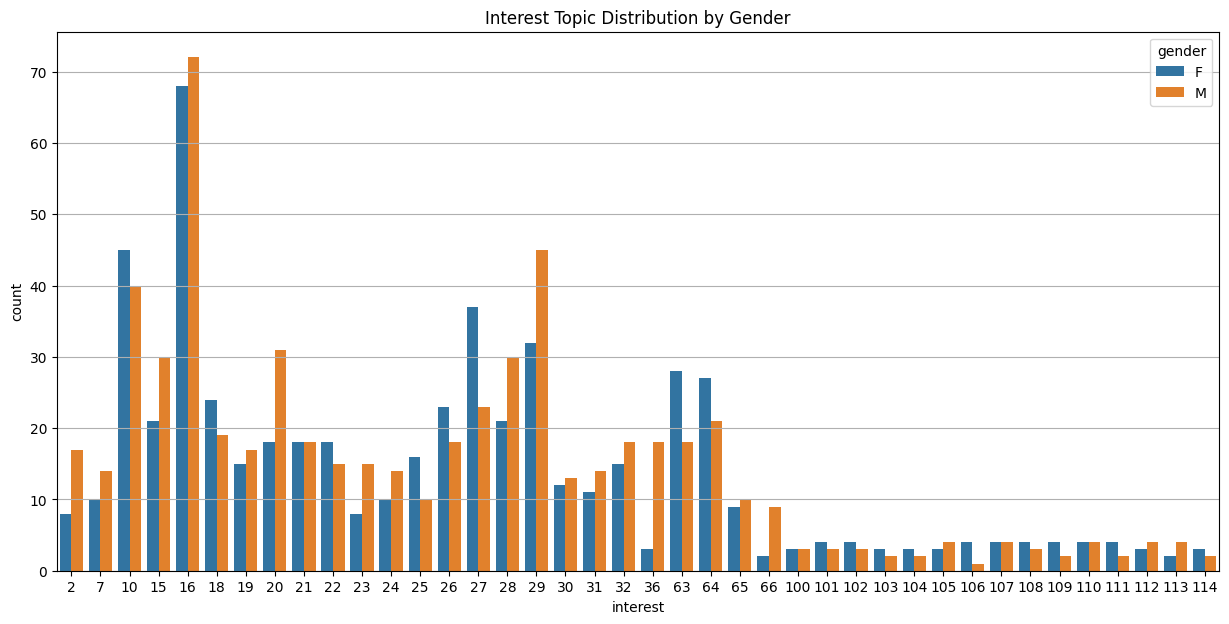

In [ ]:
# Create a figure with specified size
fig = plt.figure(figsize=(15, 7))

# Create a count plot for the distribution of interests by gender
sns.countplot(data=data, x='interest', hue='gender')

# Set the title of the plot
plt.title('Interest Topic Distribution by Gender')

# Add gridlines to the y-axis for better readability
plt.grid(axis='y')

# Show the plot
plt.show()

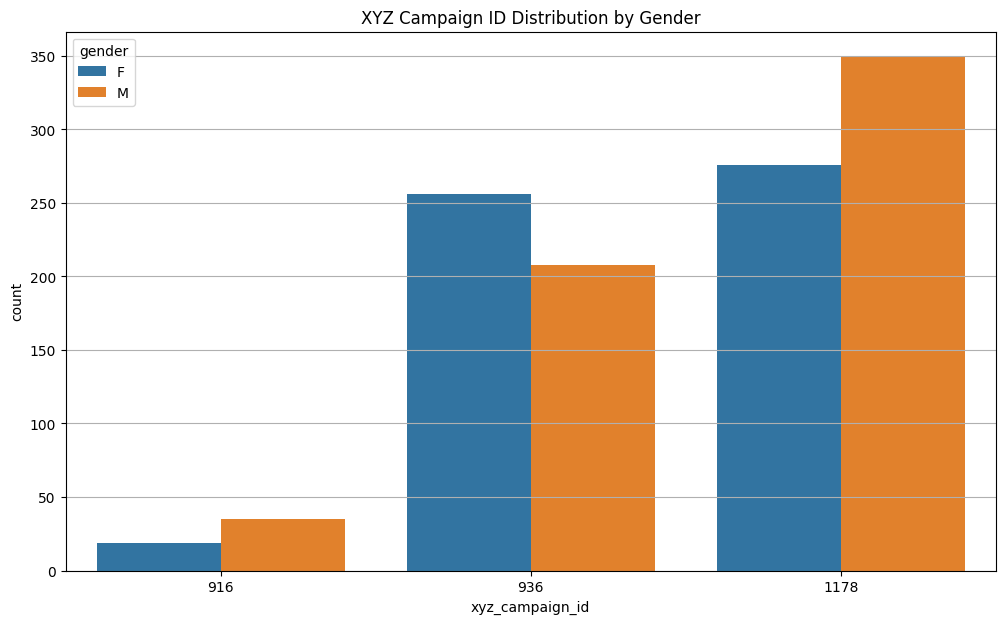

In [ ]:
# Create a figure with specified size
fig = plt.figure(figsize=(12, 7))

# Create a count plot for the distribution of xyz_campaign_id by gender
sns.countplot(data=data, x='xyz_campaign_id', hue='gender')

# Set the title of the plot
plt.title('XYZ Campaign ID Distribution by Gender')

# Add gridlines to the y-axis for better readability
plt.grid(axis='y')

# Show the plot
plt.show()

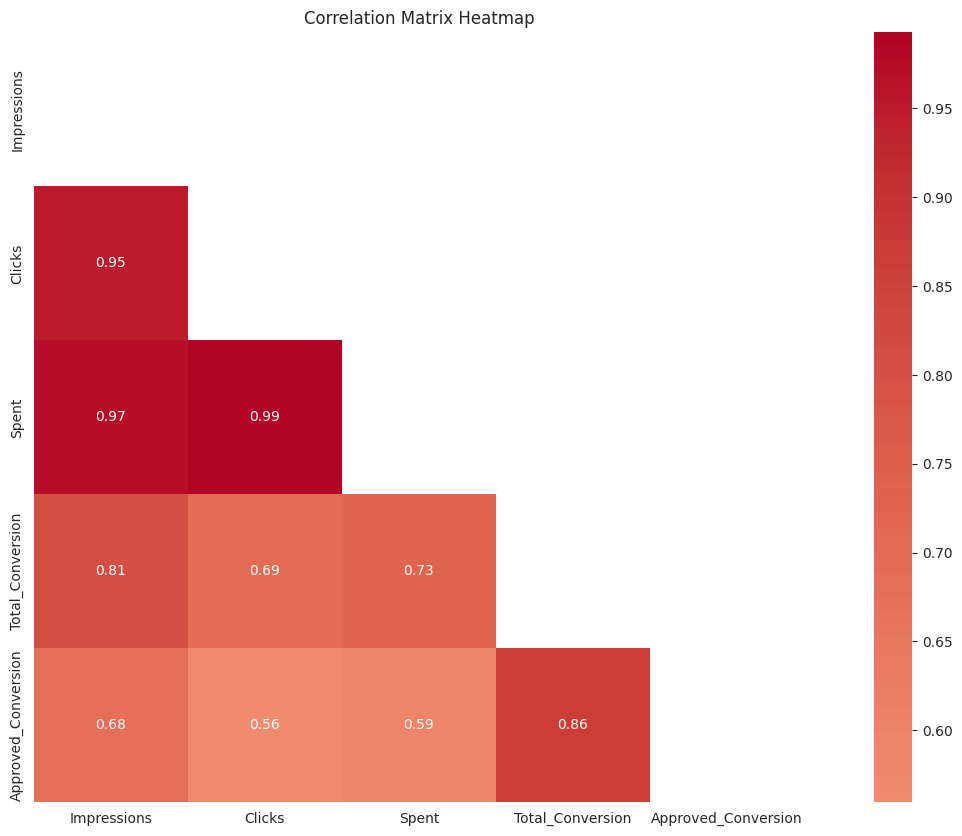

In [ ]:
# Select only numeric columns for correlation matrix
numeric_data = data.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr = numeric_data.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set the style and create the heatmap
with sns.axes_style('white'):
    fig, ax = plt.subplots(figsize=(18, 10))
    sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', center=0, square=True)

# Show the plot
plt.title('Correlation Matrix Heatmap')
plt.show()

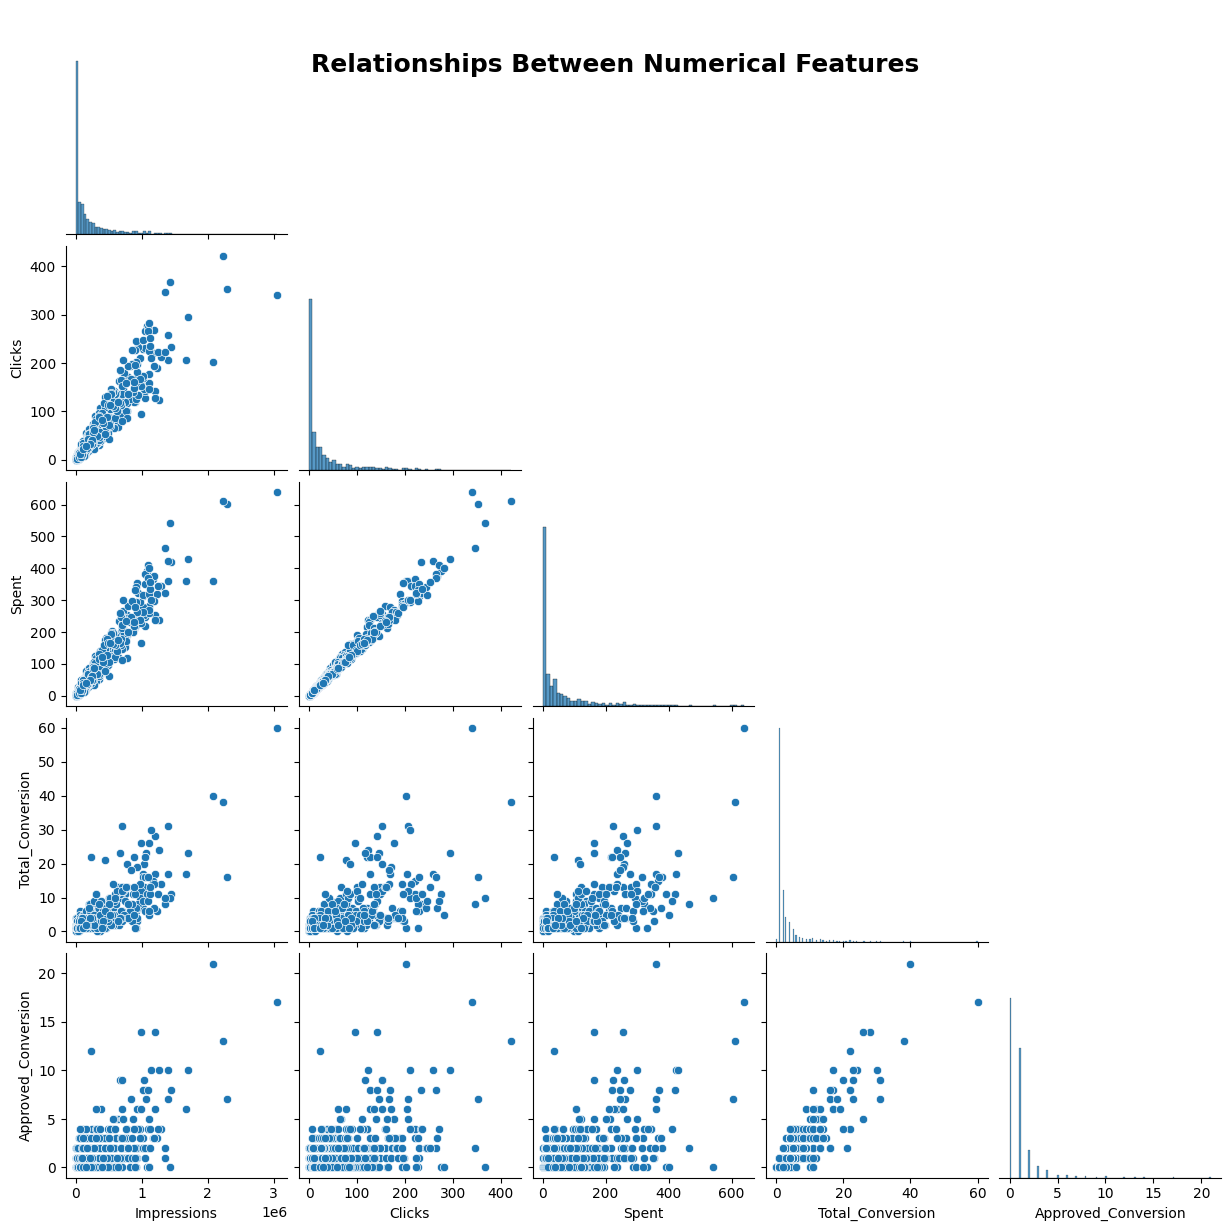

In [ ]:
# Create a pairplot for the relationships between numerical features
sns.pairplot(numeric_data, corner=True)

# Set the title for the pairplot
plt.suptitle("Relationships Between Numerical Features", x=0.5, y=0.95, size=18, weight='bold')

# Show the plot
plt.show()

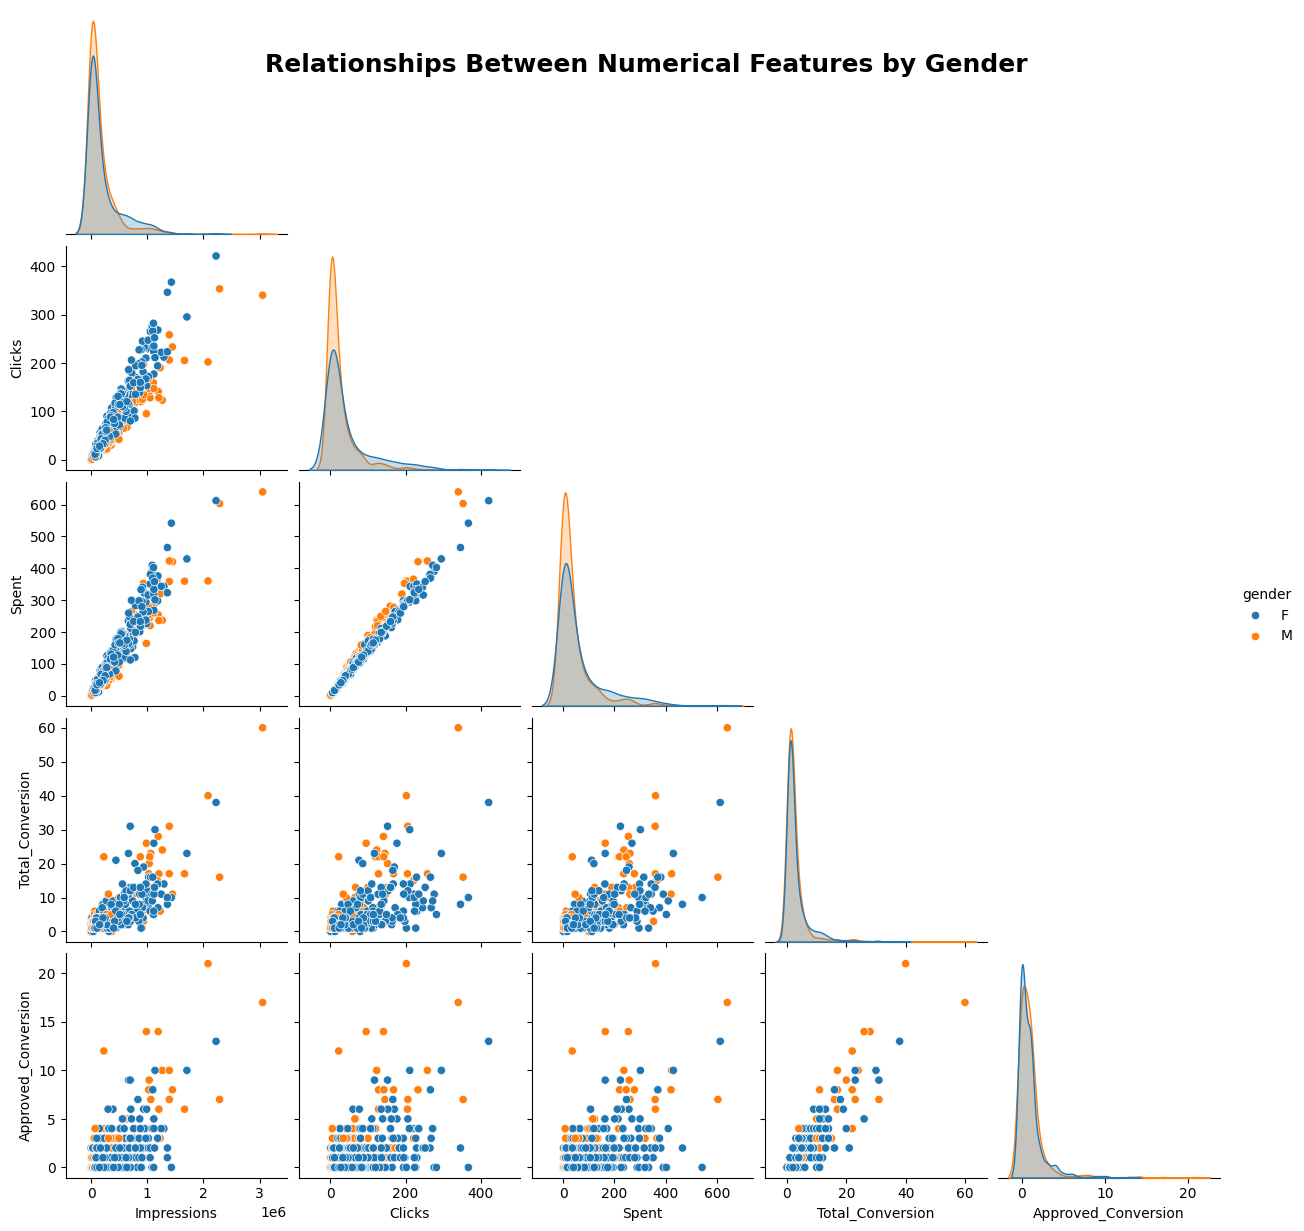

In [ ]:
# Create a pairplot for the relationships between numerical features, colored by gender
sns.pairplot(data, corner=True, hue='gender')

# Set the title for the pairplot
plt.suptitle("Relationships Between Numerical Features by Gender", x=0.5, y=0.95, size=18, weight='bold')

# Show the plot
plt.show()

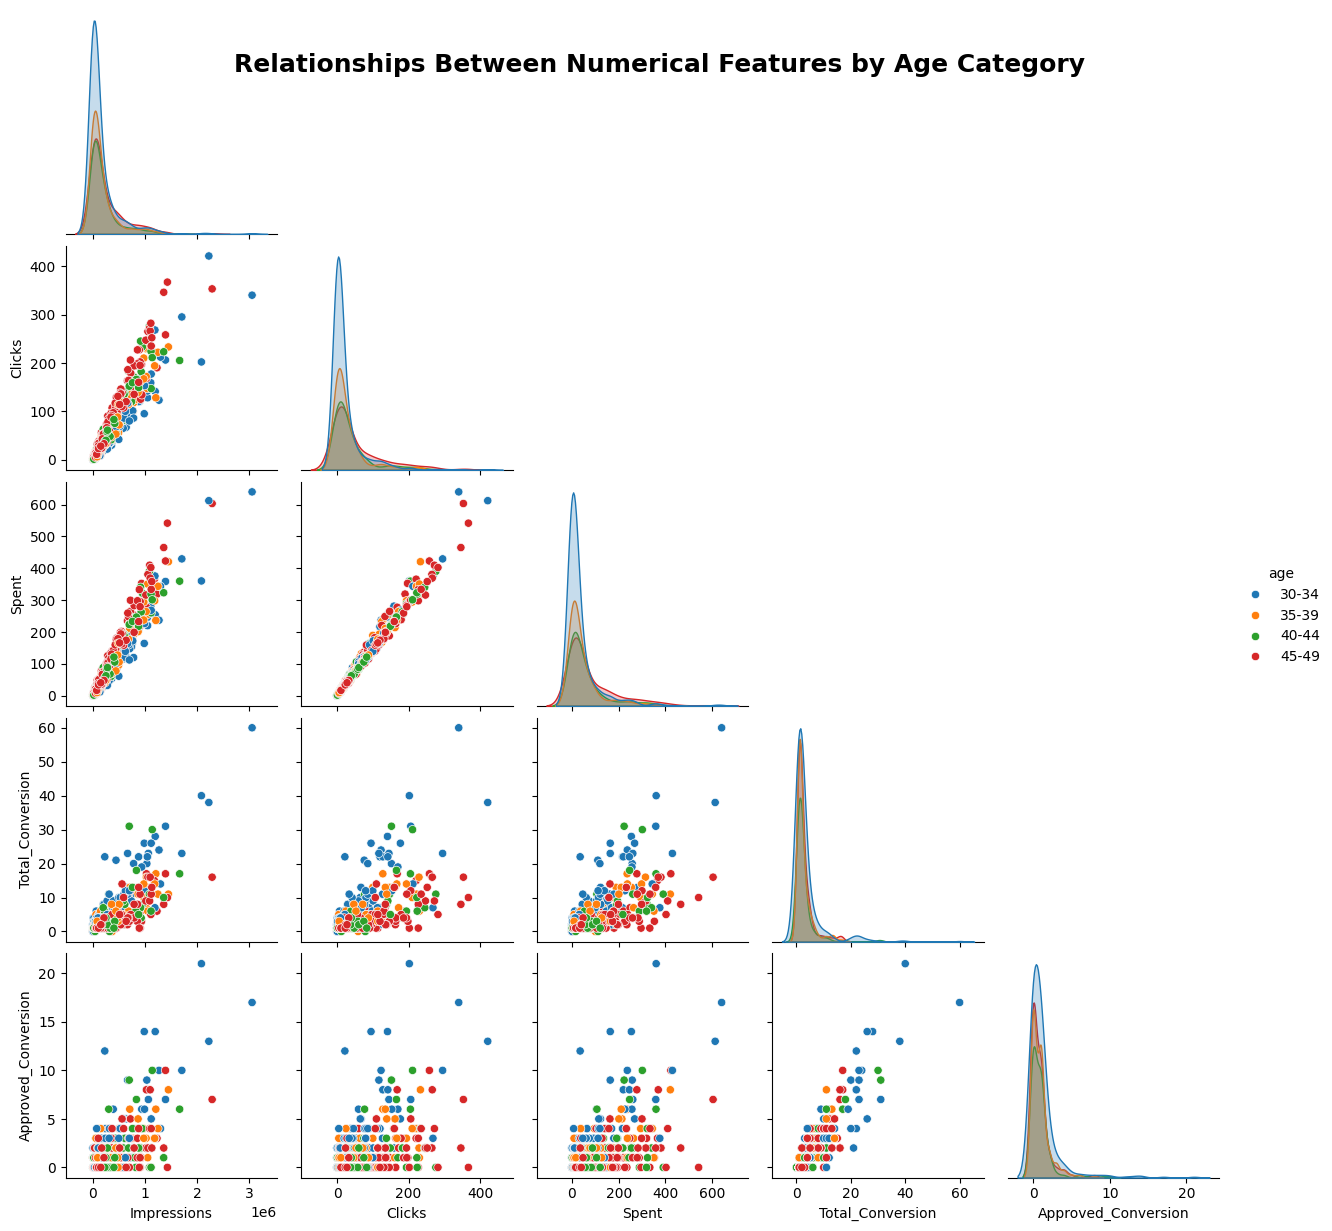

In [ ]:
# Create a pairplot for the relationships between numerical features, colored by age
sns.pairplot(data, corner=True, hue='age')

# Set the title for the pairplot
plt.suptitle("Relationships Between Numerical Features by Age Category", x=0.5, y=0.95, size=18, weight='bold')

# Show the plot
plt.show()

In [ ]:
print(data.columns)

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion'],
      dtype='object')


<ipython-input-28-197ece932483>:9: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0.5, hspace=0.8)


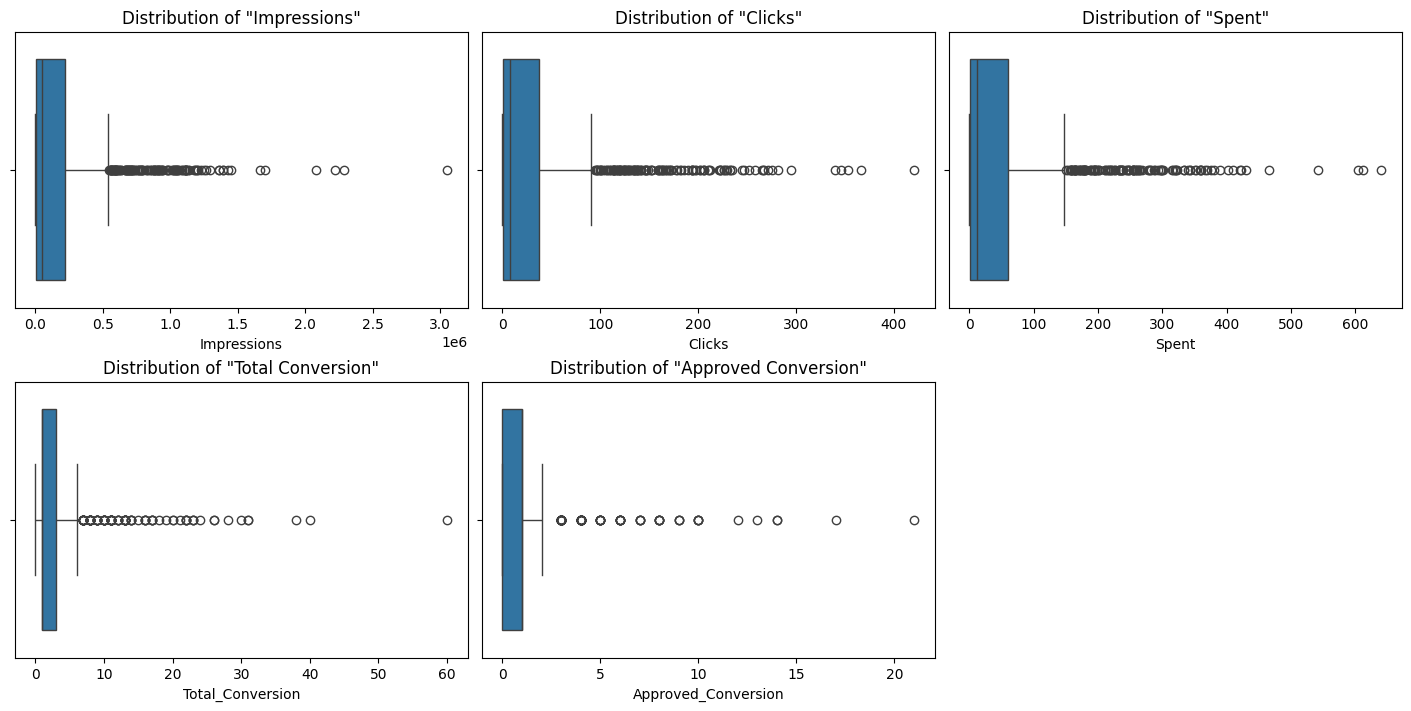

In [ ]:
# Show axes
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.spines.right'] = True
plt.rcParams['axes.spines.top'] = True
plt.rcParams['axes.spines.bottom'] = True

# Distribution of numerical variables using boxplots
fig, axes = plt.subplots(2, 3, figsize=(14, 7), constrained_layout=True)
plt.subplots_adjust(wspace=0.5, hspace=0.8)
axes[-1, -1].axis('off')  # Hide the last axis

# Create boxplots for each variable
ax = sns.boxplot(ax=axes[0, 0], data=data, x='Impressions')
ax.set_title('Distribution of "Impressions"')

ax1 = sns.boxplot(ax=axes[0, 1], data=data, x='Clicks',)
ax1.set_title('Distribution of "Clicks"')

ax2 = sns.boxplot(ax=axes[0, 2], data=data, x='Spent')
ax2.set_title('Distribution of "Spent"')

ax3 = sns.boxplot(ax=axes[1, 0], data=data, x='Total_Conversion')
ax3.set_title('Distribution of "Total Conversion"')

ax4 = sns.boxplot(ax=axes[1, 1], data=data, x='Approved_Conversion')
ax4.set_title('Distribution of "Approved Conversion"')

# Show the plot
plt.show()

### Answering few questions
1. What is the MEAN spending on ads by age group?

2. What is the MEAN spending on ads by gender?


<ipython-input-29-1cb424680a61>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spending_age = data.groupby('age')['Spent'].mean().sort_values().reset_index()
<ipython-input-29-1cb424680a61>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spending_gender = data.groupby('gender')['Spent'].mean().sort_values().reset_index()
<ipython-input-29-1cb424680a61>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_spend

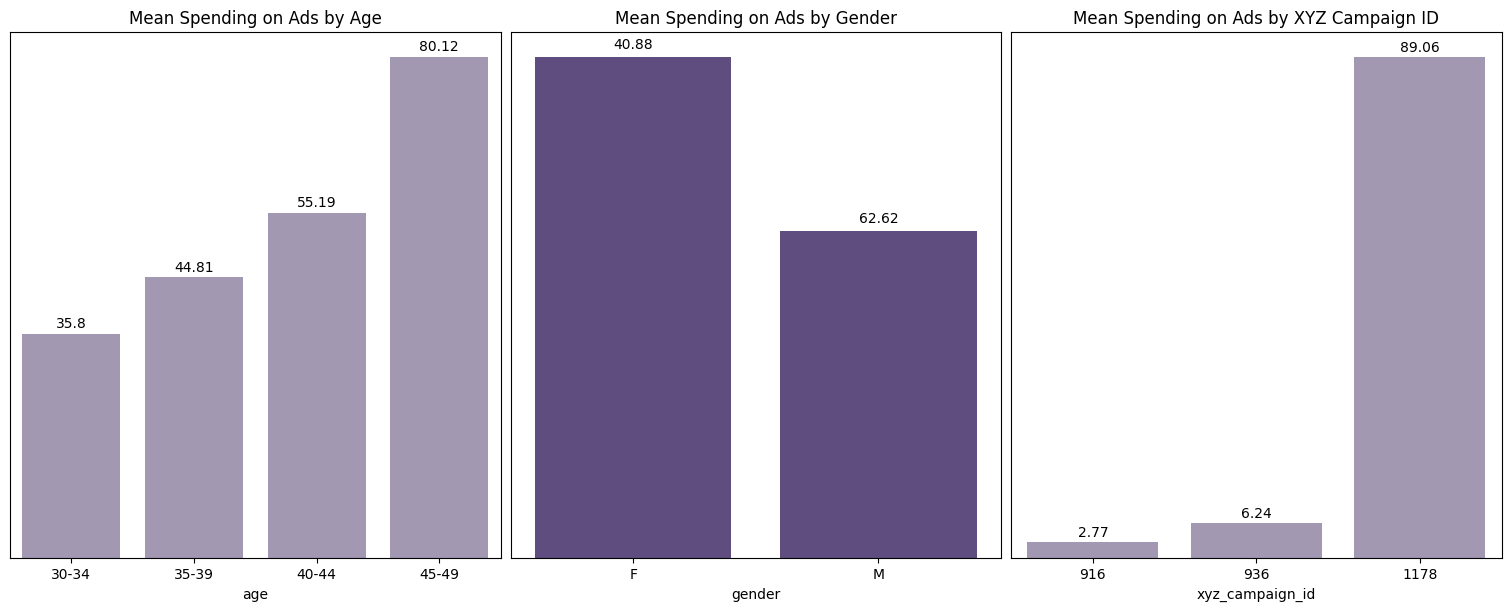

In [ ]:
# Calculate average spending
avg_spending_age = data.groupby('age')['Spent'].mean().sort_values().reset_index()
avg_spending_gender = data.groupby('gender')['Spent'].mean().sort_values().reset_index()
avg_spending_xyz = data.groupby('xyz_campaign_id')['Spent'].mean().sort_values().reset_index()

# Set up the figure and axes for the subplots
fig, axes = plt.subplots(1, 3, figsize=[15, 6], constrained_layout=True)
plt.subplots_adjust(wspace=0.5, hspace=0.8)

# Mean spending on ads by age
ax = sns.barplot(ax=axes[0], data=avg_spending_age, x='age', y='Spent', color='#A194B6')
ax.set_title('Mean Spending on Ads by Age')
ax.set_yticks([])
ax.set_ylabel('')
i = 0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 1,
            round(avg_spending_age['Spent'][i], 2), ha="center")
    i += 1

# Mean spending on ads by gender
ax1 = sns.barplot(ax=axes[1], data=avg_spending_gender, x='gender', y='Spent', color='#5E4489')
ax1.set_title('Mean Spending on Ads by Gender')
ax1.set_yticks([])
ax1.set_ylabel('')
i = 0
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2., height + 1,
             round(avg_spending_gender['Spent'][i], 2), ha="center")
    i += 1

# Third plot: Mean spending on ads by XYZ campaign ID
ax2 = sns.barplot(ax=axes[2], data=avg_spending_xyz, x='xyz_campaign_id', y='Spent', color='#A194B6')
ax2.set_title('Mean Spending on Ads by XYZ Campaign ID')
ax2.set_yticks([])
ax2.set_ylabel('')
i = 0
for p in ax2.patches:
    height = p.get_height()
    ax2.text(p.get_x() + p.get_width() / 2., height + 1,
             round(avg_spending_xyz['Spent'][i], 2), ha="center")
    i += 1

# Show the plot
plt.show()

<ipython-input-30-533a540d6004>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  AdSpend = data.groupby('gender').agg({'CTR %': 'mean'}).reset_index()


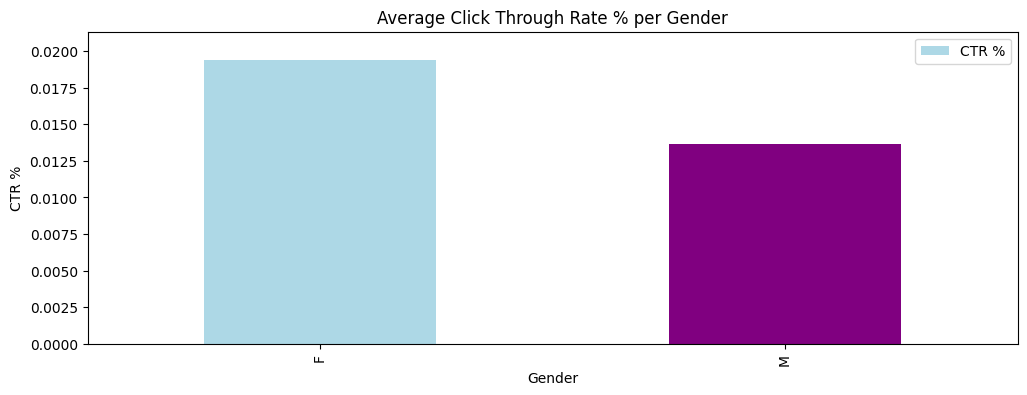

In [ ]:
# CTR is calculated as Clicks divided by Impressions
data['CTR %'] = (data['Clicks'] / data['Impressions']) * 100  # Calculate CTR as a percentage

# Calculate average CTR by gender
AdSpend = data.groupby('gender').agg({'CTR %': 'mean'}).reset_index()

# Plotting the average CTR per Gender
AdSpend.plot.bar(x='gender', y='CTR %', figsize=(12, 4), color = ['lightblue','purple'])
plt.xlabel('Gender')
plt.ylabel('CTR %')
plt.title('Average Click Through Rate % per Gender')
plt.margins(0.1)
plt.subplots_adjust(bottom=0.10)
plt.show()

 Females had a higher CTR, but the difference is not significant to conclude anything at this stage

In [ ]:
print(data.columns)

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'CTR %'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])

In [ ]:
# Create a mapping for the xyz_campaign_id values
campaign_mapping = {916: 'campaign_a', 936: 'campaign_b', 1178: 'campaign_c'}

# Apply the mapping to the 'xyz_campaign_id' column
data['xyz_campaign_id'] = data['xyz_campaign_id'].map(campaign_mapping)

In [ ]:
# Check the results
print(data['xyz_campaign_id'].unique())

['campaign_a', 'campaign_b', 'campaign_c']
Categories (3, object): ['campaign_a', 'campaign_b', 'campaign_c']


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
data[['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']] = scaler.fit_transform(
    data[['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion']])

## Clustering

In [ ]:
print(data.columns)

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'CTR %'],
      dtype='object')


In [ ]:
#encoding age
encoder=LabelEncoder()
encoder.fit(data["age"])
data["age"]=encoder.transform(data["age"])
print(data["age"])

0       0
1       0
2       0
3       0
4       0
       ..
1138    3
1139    3
1140    3
1141    3
1142    3
Name: age, Length: 1143, dtype: int64


In [ ]:
# Replace 'xyz_campaign_id' values by directly assigning to the column
data['xyz_campaign_id'] = data['xyz_campaign_id'].replace({"campaign_a": 916, "campaign_b": 936, "campaign_c": 1178})

# Check the updated values
print(data['xyz_campaign_id'].unique())

[916, 936, 1178]
Categories (3, int64): [916, 936, 1178]


<ipython-input-38-52d10e406e8d>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['xyz_campaign_id'] = data['xyz_campaign_id'].replace({"campaign_a": 916, "campaign_b": 936, "campaign_c": 1178})
<ipython-input-38-52d10e406e8d>:2: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data['xyz_campaign_id'] = data['xyz_campaign_id'].replace({"campaign_a": 916, "campaign_b": 936, "campaign_c": 1178})


In [ ]:
# Removing "Approved_Conversion" and "Total_Conversion" from dataset

x=np.array(data.drop(labels=["Approved_Conversion","Total_Conversion"], axis=1))
y=np.array(data["Total_Conversion"])

In [ ]:
y=y.reshape(len(y),1)
y

array([[-0.19092221],
       [-0.19092221],
       [-0.41405523],
       ...,
       [-0.19092221],
       [ 1.14787588],
       [ 0.47847683]])

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x= StandardScaler()
x = sc_x.fit_transform(x)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0)
rfr.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=10, random_state=0)

In [ ]:
y_pred=rfr.predict(x_test)
y_pred=np.round(y_pred)

In [ ]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=np.sqrt(mse)
r2_score=r2_score(y_test, y_pred)

In [ ]:
mae

0.4432649114310135

In [ ]:
r2_score

0.6421632431666

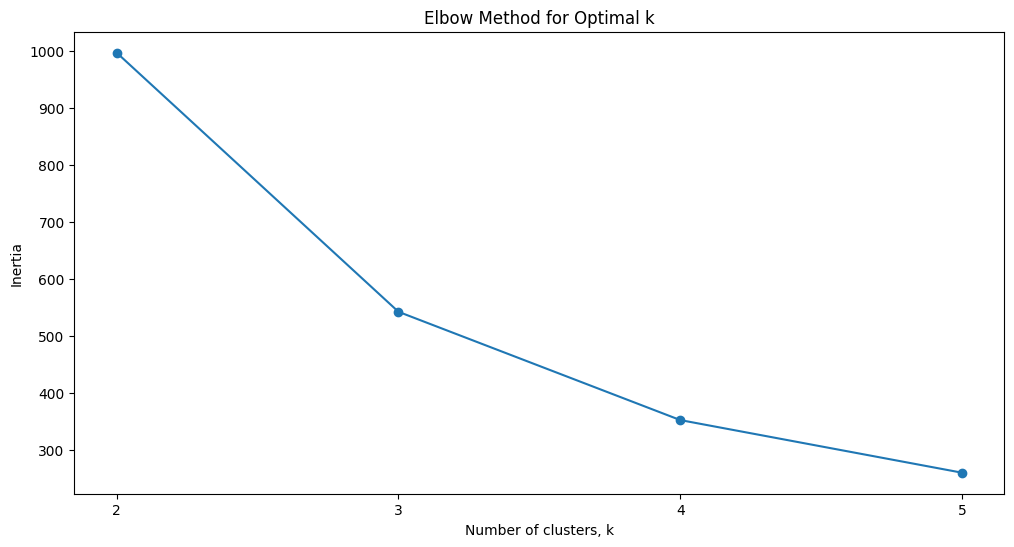

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import plotly.express as px

# Standardize the features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Impressions', 'Clicks', 'Spent']])

# Convert the scaled features back to a DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=['Impressions', 'Clicks', 'Spent'])

# Combine the original DataFrame (without dropping any columns) with the scaled features
data_scaled = data.copy()  # Create a copy of the original DataFrame
data_scaled[['Impressions', 'Clicks', 'Spent']] = scaled_df  # Replace the original columns with scaled ones

# Elbow Method to determine the optimal number of clusters
ks = range(2, 6)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_df)  # Fit the model on the scaled features
    inertias.append(model.inertia_)

# Plot inertia vs number of clusters
plt.figure(figsize=(12, 6))
plt.plot(ks, inertias, '-o')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.title('Elbow Method for Optimal k')
plt.show()

In [ ]:
print(data.columns)

Index(['ad_id', 'xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
       'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion',
       'Approved_Conversion', 'CTR %'],
      dtype='object')


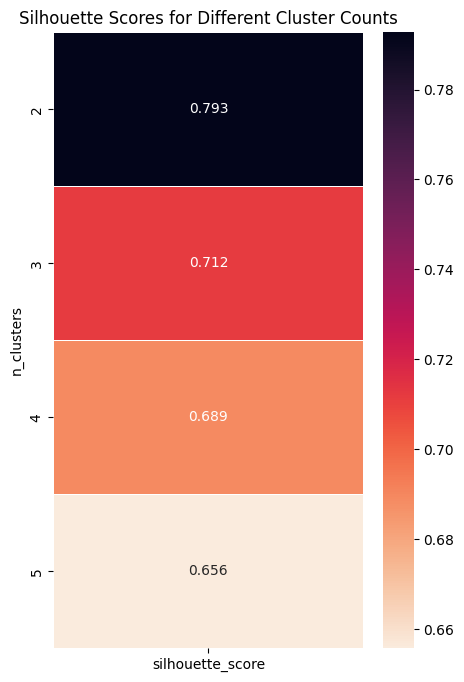

In [ ]:
# Silhouette Scores
results = []
for k in ks:
    model = KMeans(n_clusters=k, random_state=42)
    cluster_labels = model.fit_predict(scaled_df[['Impressions', 'Clicks', 'Spent']])  # Use scaled columns for clustering
    silh_avg = silhouette_score(scaled_df[['Impressions', 'Clicks', 'Spent']], cluster_labels)  # Silhouette score
    results.append([k, silh_avg])

result = pd.DataFrame(results, columns=['n_clusters', 'silhouette_score'])
pivot_km = pd.pivot_table(result, index='n_clusters', values='silhouette_score')

# Heatmap of Silhouette Scores
plt.figure(figsize=(5, 8))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap='rocket_r')
plt.title('Silhouette Scores for Different Cluster Counts')
plt.show()

In [ ]:
# Fit the KMeans model with the optimal number of clusters (e.g., 3)
optimal_k = 3  # Change this based on your Elbow Method results
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Perform clustering using the scaled features
data['Cluster'] = kmeans.fit_predict(scaled_features)

# 3D Scatter Plot
fig = px.scatter_3d(data_frame=data, x='Impressions', y='Clicks', z='Spent',
                     color='Cluster', color_discrete_sequence=['#FF0000', '#00FF00', '#000080'],
                     title='3D Scatter Plot of Clusters')

# Update marker size for better visualization
fig.update_traces(marker=dict(size=5))

# Show the plot
fig.show()

In [ ]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Perform clustering using the scaled features
data['Cluster'] = kmeans.fit_predict(scaled_features)

# 3D Scatter Plot with Plotly
fig = px.scatter_3d(data_frame=data, x='Impressions', y='Clicks', z='Spent',
                    color='Cluster',
                    color_discrete_sequence=['#FF0000', '#00FF00', '#000080'],
                    title='3D Scatter Plot of Clusters')

# Update marker size for better visibility and add opacity to reduce overlap
fig.update_traces(marker=dict(size=8, opacity=0.8))  # Increase size and set opacity

# Adjust camera position for a better initial view
fig.update_layout(scene_camera=dict(eye=dict(x=1.5, y=1.5, z=1.5)))  # Modify for better viewing angles

# Optionally, add grid lines and more control for zoom
fig.update_layout(scene=dict(xaxis=dict(showgrid=True),
                             yaxis=dict(showgrid=True),
                             zaxis=dict(showgrid=True)))

# Show the plot
fig.show()

In [ ]:
# Create a binary target variable for classification
data['Approved_Conversion_Binary'] = data['Approved_Conversion'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
data['CPC'] = data['Spent'] / (data['Clicks'] + 1e-5)

# Define the feature set and target variable
X = data[['xyz_campaign_id', 'fb_campaign_id', 'age', 'gender',
          'interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'CTR %', 'CPC']]
y = data['Approved_Conversion_Binary']

# Split the data into training and testing sets
X_train_classification, X_test_classification, y_train_classification, y_test_classification = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Scale numerical features
scaler = StandardScaler()
X_train_classification[['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'CTR %', 'CPC']] = scaler.fit_transform(
    X_train_classification[['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'CTR %', 'CPC']]
)
X_test_classification[['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'CTR %', 'CPC']] = scaler.transform(
    X_test_classification[['Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'CTR %', 'CPC']]
)

In [ ]:
# Define parameter grids for hyperparameter tuning
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt_param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize classifiers for GridSearchCV
rf_gs = GridSearchCV(RandomForestClassifier(random_state=42), rf_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
dt_gs = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit models with hyperparameter tuning
rf_gs.fit(X_train_classification, y_train_classification)
dt_gs.fit(X_train_classification, y_train_classification)

# Retrieve the best models and their parameters
best_rf = rf_gs.best_estimator_
best_dt = dt_gs.best_estimator_

# Predictions and evaluations
best_rf_pred = best_rf.predict(X_test_classification)
best_dt_pred = best_dt.predict(X_test_classification)

# Calculate accuracy and generate classification reports
best_rf_accuracy = accuracy_score(y_test_classification, best_rf_pred)
best_dt_accuracy = accuracy_score(y_test_classification, best_dt_pred)

print("Random Forest Best Parameters:", rf_gs.best_params_)
print("Decision Tree Best Parameters:", dt_gs.best_params_)
print("Random Forest Accuracy:", best_rf_accuracy)
print("Decision Tree Accuracy:", best_dt_accuracy)
print("\nRandom Forest Classification Report:\n", classification_report(y_test_classification, best_rf_pred))
print("\nDecision Tree Classification Report:\n", classification_report(y_test_classification, best_dt_pred))

Random Forest Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Decision Tree Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}
Random Forest Accuracy: 0.6506550218340611
Decision Tree Accuracy: 0.6419213973799127

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.82      0.70       114
           1       0.73      0.49      0.58       115

    accuracy                           0.65       229
   macro avg       0.67      0.65      0.64       229
weighted avg       0.67      0.65      0.64       229


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.80      0.69       114
           1       0.71      0.49      0.58       115

    accuracy                           0.64       229
   macro avg       0.66      0.64      0.63       229
weighted avg       0.6